# PIMA Indians Diabetes Dataset

## Business Understanding 

Diabetes is the onset and one of the leading diseases in the United States, with 10.5% of the population living with diabetes or pre-diabetes in the country. This figure amounts to 26.8 million diagnosed with diabetes out of a population of 327.2 million. Of that 26.8 million, 14.7% are American Indians/Alaskan Natives. This information is provided in accordance by Diabetes.org

## Data Understanding

In [3]:
#Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Importing our dataset

diabetes = pd.read_csv('Desktop/Diabetes/diabetes.csv')

In [20]:
#We are investigating the dataset to see what columns we have available in our dataset

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After importing our dataset, the target variable is the Outcome column. This column tells us if the patient has diabetes or not represented by 1.

In [17]:
#Here we will see how many rows and columns of data we have

diabetes.shape

(768, 9)

In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#We want to see if there any null values in our dataset

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we have seen in our data there are no missing values

In [22]:
#Checking the types of data 

diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

We can see that we have no object variables therefore no columns within our data need to be converted before we process our Machine Learning models.

In [24]:
#We are going to investigate the variables in the chart that have the strongest correlation with each variable

diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


As we can see in our dataset, the strongest correlating variables are:

- BMI vs Blood Pressure (0.281805)
- Age vs Blood Pressure (0.239528)
- Outcome vs Glucose (0.466581)
- Insulin v Skin Thickness (0.436783)
- BMI v Skin Thickness (0.392573)
- Glucose v Insulin (0.331357)

From these relationships we will utilise the strong four variables and later we will try to find out the strongest indicators in determining whether a patient has diabetes or not.

In [26]:
#We are looking to see how many rows of duplicated data we have

duplicate_rows_diabetes = diabetes[diabetes.duplicated()]

print("The number of duplicate rows are: ", duplicate_rows_diabetes.shape)

The number of duplicate rows are:  (0, 9)


We can see that there are no duplicate rows in our dataset

## Data Visualizations

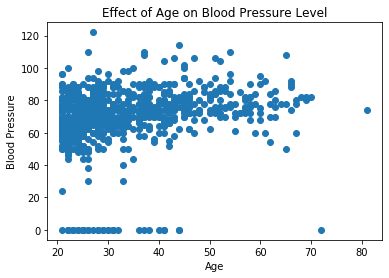

In [35]:
#Here we will create some visualizations of the variables that have the best relationships

#We will display how age has an impact on blood pressure

x = diabetes['Age']
y = diabetes['BloodPressure']

plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Effect of Age on Blood Pressure Level')

plt.scatter(x,y)

The plot here doesn't show a very linear relationship between Age and Blood Pressure.

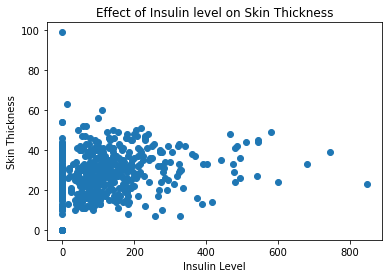

In [38]:
#We will show how insulin has an effect on skin thickness

x1 = diabetes['Insulin']
y1 = diabetes['SkinThickness']

plt.xlabel('Insulin Level')
plt.ylabel('Skin Thickness')
plt.title('Effect of Insulin level on Skin Thickness')

plt.scatter(x1,y1)

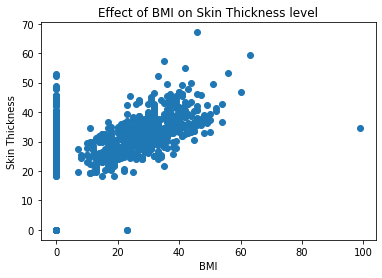

In [39]:
#We will show how level of BMI effects skin thickness 

x2 = diabetes['SkinThickness']
y2 = diabetes['BMI']

plt.xlabel('BMI')
plt.ylabel('Skin Thickness')
plt.title('Effect of BMI on Skin Thickness level')

plt.scatter(x2,y2)

In [ ]:
#We are going to show the effect of Glucose on Insulin

x3 = diabetes['Glucose']
y3 = diabetes['Insulin']

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Effect of Glucose on Insulin level")